EXPLORATORY DATA ANALYSIS

In [64]:
##Import Libraries##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

In [65]:
##Load dataset##
df=pd.read_csv("country_profile_nigeria .csv")
##Preview dataset##
df.head(5)

,Diseases & Risk Factors,Indicator Name,Cancer Type,Year,Country Name,Region,Gender,Area,Numeric,Lower Confidence Limit,Upper Confidence Limit,Comment,Unnamed: 12
0,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Total,NaN,21,no data,no data,NaN,NaN
1,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Males,NaN,23,no data,no data,NaN,NaN
2,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2000,Nigeria,African Region,Females,NaN,19,no data,no data,NaN,NaN
3,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2001,Nigeria,African Region,Total,NaN,21,no data,no data,NaN,NaN
4,Noncommunicable diseases,Probability of premature mortality from NCDs,NaN,2001,Nigeria,African Region,Males,NaN,23,no data,no data,NaN,NaN


In [66]:
##check the shape##
df.shape

(6460, 13)

In [67]:
##Check column names##
df.columns

Index(['Diseases & Risk Factors', 'Indicator Name', 'Cancer Type', 'Year',
       'Country Name', 'Region', 'Gender', 'Area', 'Numeric',
       'Lower Confidence Limit', 'Upper Confidence Limit', 'Comment',
       'Unnamed: 12'],
      dtype='object')

In [68]:
##Rename columns##
df.rename(columns={'Diseases & Risk Factors': 'disease_risk_factor', 'Indicator Name': 'indicator_name', 'Cancer Type': 'cancer_type', 'Year': 'year',
       'Country Name': 'country_name', 'Region': 'region', 'Gender':'gender', 'Area':'area', 'Numeric':'numeric',
       'Lower Confidence Limit':'lcl', 'Upper Confidence Limit':'ucl', 'Comment':'comment'}, inplace=True)

In [69]:
##Check for missing values##
df.isnull().sum()

disease_risk_factor       0
indicator_name            0
cancer_type            6400
year                      0
country_name              0
region                    0
gender                  281
area                   6330
numeric                   0
lcl                     157
ucl                     157
comment                6310
Unnamed: 12            6460
dtype: int64

In [70]:
##drop columns##
df= df.drop(columns=['cancer_type', 'area', 'comment', 'Unnamed: 12','region', 'country_name'])

In [71]:
## droping missing values from columns##
df=df.dropna(subset=['gender', 'lcl', 'ucl'])

In [72]:
##recheck shape##
df.shape

(6173, 7)

In [73]:
##recheck missing values##
df.isnull().sum()

disease_risk_factor    0
indicator_name         0
year                   0
gender                 0
numeric                0
lcl                    0
ucl                    0
dtype: int64

In [74]:
##check datatypes##
df.dtypes

disease_risk_factor    object
indicator_name         object
year                   object
gender                 object
numeric                object
lcl                    object
ucl                    object
dtype: object

In [75]:
##converting columns to numeric###
df['numeric']=pd.to_numeric(df['numeric'], errors='coerce')
df['lcl']=pd.to_numeric(df['lcl'], errors='coerce')
df['ucl']=pd.to_numeric(df['ucl'], errors='coerce')

In [76]:
##converting "year" to integer##
df['year']=pd.to_numeric(df['year'], errors='coerce').astype('int64')

In [77]:
##recheck data types##
df.dtypes

disease_risk_factor     object
indicator_name          object
year                     int64
gender                  object
numeric                float64
lcl                    float64
ucl                    float64
dtype: object

In [78]:
##drop duplicates##
df.drop_duplicates(inplace=True)

In [79]:
##view unique values##
print('DRF:',df['disease_risk_factor'].unique())
print('YR:',df['year'].unique())
print('GEN:',df['gender'].unique())

DRF: ['Noncommunicable diseases' 'Air pollution' 'Harmful Alcohol Use' 'Cancer'
 'Chronic respiratory diseases' 'Cardiovascular diseases' 'Diabetes'
 'Obesity/unhealthy diet' 'Physical inactivity' 'Tobacco Use']
YR: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
GEN: ['Total' 'Males' 'Females']


In [80]:
##removing gender = 'Total'##
df=df[df['gender'] != 'Total']

DISCRIPTIVE ANALYSIS

DIABETES 

In [81]:
##filter for diabetes indicators##
diabetes_df=df[df['disease_risk_factor'].str.contains('diabetes', case=False, na=False)]

In [82]:
##indicator names in diabetes dataframe##
print(diabetes_df['indicator_name'].unique())

['Number of deaths due to diabetes' 'Diabetes age-standardized death rate'
 'Percentage of diabetes deaths occurring under 70 years'
 'Diabetes, adults aged 18+' 'Diabetes, adults aged 30+'
 'Diabetes treatment, adults aged 30+ with diabetes'
 'Overweight, adults aged 18+' 'Obesity, adults aged 18+'
 'Obesity, adolescents aged 10–19' 'Current tobacco use, adults aged 15+'
 'Physical inactivity, adults aged 18+']


In [83]:
##check shape##
diabetes_df.shape

(458, 7)

In [84]:
##check for missing values##
diabetes_df.isnull().sum()

disease_risk_factor      0
indicator_name           0
year                     0
gender                   0
numeric                  0
lcl                    120
ucl                    120
dtype: int64

In [85]:
##drop 'lcl' and 'ucl' columns##
diabetes_df=diabetes_df.drop(columns=['lcl', 'ucl'])

In [86]:
##preview the dataset##
diabetes_df.head(5)

,disease_risk_factor,indicator_name,year,gender,numeric
4031,Diabetes,Number of deaths due to diabetes,2000,Males,8421.812103
4032,Diabetes,Number of deaths due to diabetes,2000,Females,7008.158825
4034,Diabetes,Number of deaths due to diabetes,2001,Males,8883.018326
4035,Diabetes,Number of deaths due to diabetes,2001,Females,7343.289539
4037,Diabetes,Number of deaths due to diabetes,2002,Males,9066.527004


In [87]:
##count unique values in 'indicator_name' column##
diabetes_df['indicator_name'].value_counts()

indicator_name
Diabetes, adults aged 18+                                 46
Diabetes, adults aged 30+                                 46
Diabetes treatment, adults aged 30+ with diabetes         46
Overweight, adults aged 18+                               46
Obesity, adults aged 18+                                  46
Obesity, adolescents aged 10–19                           46
Physical inactivity, adults aged 18+                      46
Number of deaths due to diabetes                          40
Diabetes age-standardized death rate                      40
Percentage of diabetes deaths occurring under 70 years    40
Current tobacco use, adults aged 15+                      16
Name: count, dtype: int64

In [88]:
# Subset prevalence data
prevalence_indicators = [ "Diabetes, adults aged 18+","Diabetes, adults aged 30+"]
diabetes_prev = diabetes_df[diabetes_df['indicator_name'].isin(prevalence_indicators)].copy()
# Quick check
print(diabetes_prev['indicator_name'].unique())
print(diabetes_prev.head())

['Diabetes, adults aged 18+' 'Diabetes, adults aged 30+']
     disease_risk_factor             indicator_name  year   gender   numeric
4211            Diabetes  Diabetes, adults aged 18+  2000    Males  5.040135
4212            Diabetes  Diabetes, adults aged 18+  2000  Females  8.810241
4214            Diabetes  Diabetes, adults aged 18+  2001    Males  5.182807
4215            Diabetes  Diabetes, adults aged 18+  2001  Females  8.776517
4217            Diabetes  Diabetes, adults aged 18+  2002    Males  5.338517


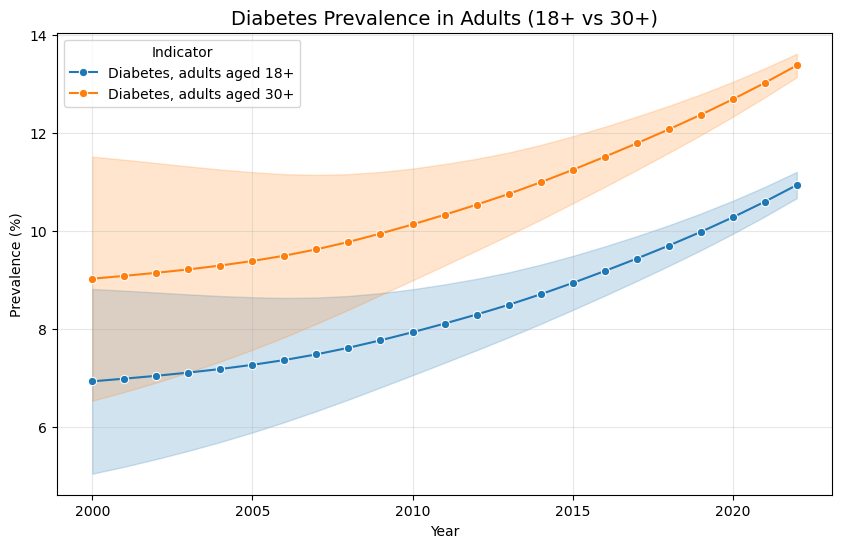

In [89]:
plt.figure(figsize=(10,6))
sns.lineplot(data=diabetes_prev, x='year', y='numeric', hue='indicator_name', marker="o")
plt.title("Diabetes Prevalence in Adults (18+ vs 30+)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend(title="Indicator")
plt.grid(True, alpha=0.3)
plt.show()

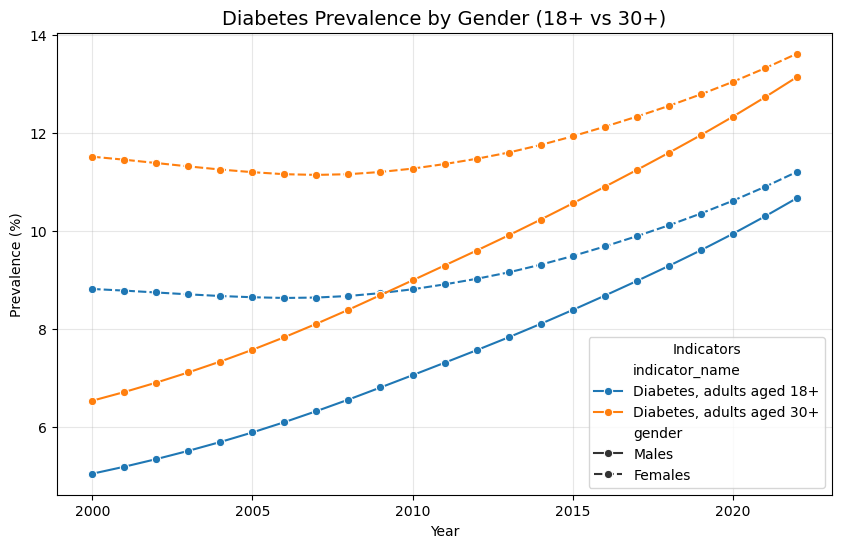

In [90]:
plt.figure(figsize=(10,6))
sns.lineplot(data=diabetes_prev, x='year', y='numeric', hue='indicator_name', style='gender',marker="o")
plt.title("Diabetes Prevalence by Gender (18+ vs 30+)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend(title="Indicators")
plt.grid(True, alpha=0.3)
plt.show()

In [91]:
# Subset treatment coverage
treatment = diabetes_df[diabetes_df['indicator_name'] == "Diabetes treatment, adults aged 30+ with diabetes"].copy()
print(treatment.head())

     disease_risk_factor                                     indicator_name  \
4349            Diabetes  Diabetes treatment, adults aged 30+ with diabetes   
4350            Diabetes  Diabetes treatment, adults aged 30+ with diabetes   
4352            Diabetes  Diabetes treatment, adults aged 30+ with diabetes   
4353            Diabetes  Diabetes treatment, adults aged 30+ with diabetes   
4355            Diabetes  Diabetes treatment, adults aged 30+ with diabetes   

      year   gender    numeric  
4349  2000    Males  22.778442  
4350  2000  Females  22.283585  
4352  2001    Males  22.892601  
4353  2001  Females  22.577923  
4355  2002    Males  23.002615  


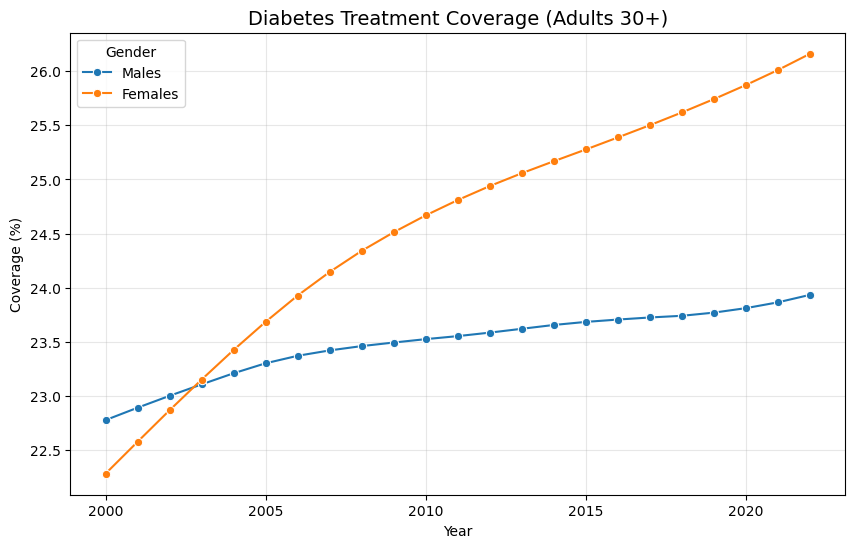

In [92]:
plt.figure(figsize=(10,6))
sns.lineplot( data=treatment,x='year', y='numeric', hue='gender', marker="o")
plt.title("Diabetes Treatment Coverage (Adults 30+)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend(title="Gender")
plt.grid(True, alpha=0.3)
plt.show()

In [93]:
# Subset only "Number of deaths due to diabetes"
diabetes_deaths = diabetes_df[diabetes_df['indicator_name'] == "Number of deaths due to diabetes"].copy()
print(diabetes_deaths.head())

     disease_risk_factor                    indicator_name  year   gender  \
4031            Diabetes  Number of deaths due to diabetes  2000    Males   
4032            Diabetes  Number of deaths due to diabetes  2000  Females   
4034            Diabetes  Number of deaths due to diabetes  2001    Males   
4035            Diabetes  Number of deaths due to diabetes  2001  Females   
4037            Diabetes  Number of deaths due to diabetes  2002    Males   

          numeric  
4031  8421.812103  
4032  7008.158825  
4034  8883.018326  
4035  7343.289539  
4037  9066.527004  


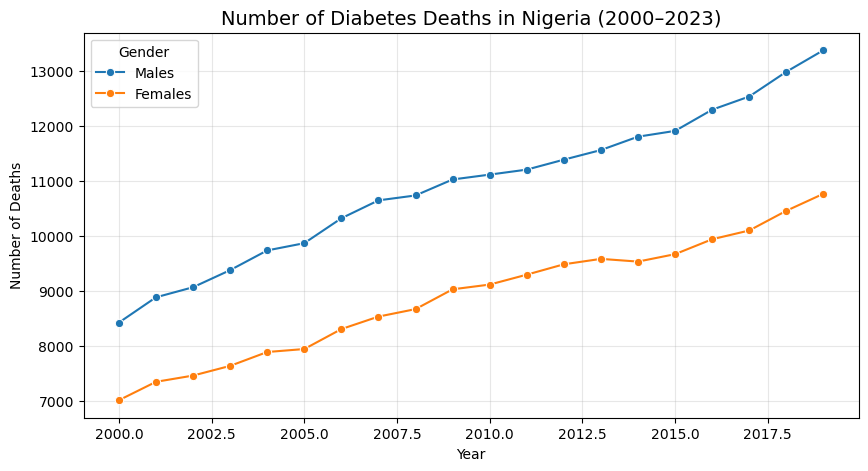

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(data=diabetes_deaths,x='year', y='numeric',hue='gender',marker="o")
plt.title("Number of Diabetes Deaths in Nigeria (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title="Gender")
plt.grid(True, alpha=0.3)
plt.show()

In [95]:
# Subset only "Physical inactivity, adults aged 18+"
inactivity = diabetes_df[diabetes_df['indicator_name'] == "Physical inactivity, adults aged 18+"].copy()
print(inactivity.head())

     disease_risk_factor                        indicator_name  year   gender  \
4649            Diabetes  Physical inactivity, adults aged 18+  2000    Males   
4650            Diabetes  Physical inactivity, adults aged 18+  2000  Females   
4652            Diabetes  Physical inactivity, adults aged 18+  2001    Males   
4653            Diabetes  Physical inactivity, adults aged 18+  2001  Females   
4655            Diabetes  Physical inactivity, adults aged 18+  2002    Males   

        numeric  
4649  18.763428  
4650  24.431900  
4652  18.713737  
4653  24.180231  
4655  18.663595  


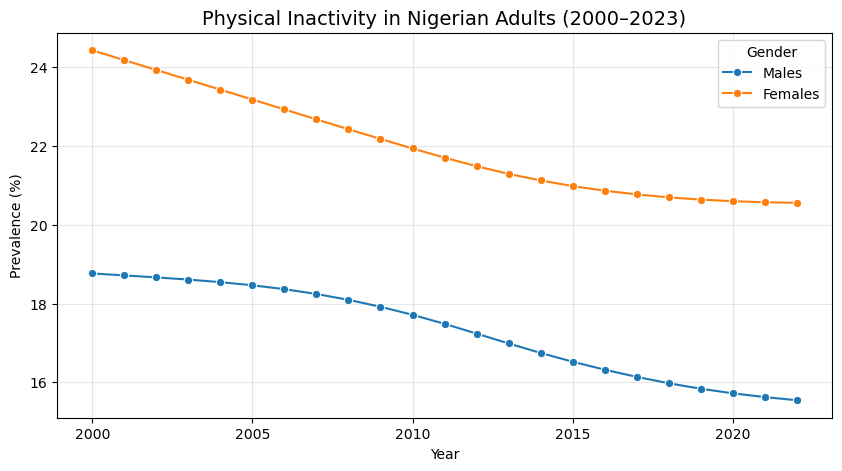

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(data=inactivity,x='year', y='numeric',hue='gender',marker="o")
plt.title("Physical Inactivity in Nigerian Adults (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend(title="Gender")
plt.grid(True, alpha=0.3)
plt.show()

In [97]:
# Define indicators of interest
diabetes_death_indicator = "Number of deaths due to diabetes"
risk_factors = [ "Diabetes, adults aged 18+","Obesity, adults aged 18+", "Overweight, adults aged 18+", "Physical inactivity, adults aged 18+"]

# Pivot the dataframe to wide format (year x indicator)
df_pivot = df[df['indicator_name'].isin(risk_factors + [diabetes_death_indicator])]
df_pivot = df_pivot.pivot_table(index="year", columns="indicator_name",values="numeric",aggfunc="mean")

# Correlation table (aligned series)
correlations = {}
for rf in risk_factors:
    aligned = df_pivot[[rf, diabetes_death_indicator]].dropna()
    if len(aligned) > 1:  
        corr, _ = pearsonr(aligned[rf], aligned[diabetes_death_indicator])
        correlations[rf] = corr
    else:
        correlations[rf] = None  

corr_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation with Diabetes deaths"])
print(corr_df)

                                      Correlation with Diabetes deaths
Diabetes, adults aged 18+                                     0.962396
Obesity, adults aged 18+                                      0.997089
Overweight, adults aged 18+                                   0.992149
Physical inactivity, adults aged 18+                         -0.984858


CARDIOVASCULAR DISEASES (CVD)

In [98]:
##filter for Cardiovascular diseases indicators##
cvd_df=df[df['disease_risk_factor'].str.contains('Cardiovascular diseases', case=False, na=False)]

In [99]:
##indicator names in cvd dataframe##
print(cvd_df['indicator_name'].unique())

['Number of deaths due to cardiovascular diseases'
 'CVD age-standardized death rate'
 'Percentage of CVD deaths occurring under 70 years'
 'Raised blood pressure, adults aged 30–79 years'
 'Hypertension, adults aged 30–79'
 'Diagnosed hypertension, adults aged 30–79 with hypertension'
 'Treated hypertension, adults aged 30–79 with hypertension'
 'Controlled hypertension, adults aged 30–79 with hypertension'
 'Mean total cholesterol, adults aged 18+' 'Diabetes, adults aged 18+'
 'Diabetes, adults aged 30+'
 'Diabetes treatment, adults aged 30+ with diabetes'
 'Overweight, adults aged 18+' 'Obesity, adults aged 18+'
 'Obesity, adolescents aged 10–19' 'Current tobacco use, adults aged 15+'
 'Mean population salt intake, adults aged 25+'
 'Physical inactivity, adults aged 18+'
 'Heavy episodic drinking, adults aged 15+'
 'Total alcohol per capita consumption']


In [100]:
##check shape##
cvd_df.shape

(752, 7)

In [101]:
##check for missing values##
cvd_df.isnull().sum()

disease_risk_factor      0
indicator_name           0
year                     0
gender                   0
numeric                  0
lcl                    164
ucl                    164
dtype: int64

In [102]:
##drop 'lcl' and 'ucl' columns##
cvd_df=cvd_df.drop(columns=['lcl', 'ucl'])

In [103]:
##preview the dataset##
cvd_df.head(5)

,disease_risk_factor,indicator_name,year,gender,numeric
2879,Cardiovascular diseases,Number of deaths due to cardiovascular diseases,2000,Males,67415.71100
2880,Cardiovascular diseases,Number of deaths due to cardiovascular diseases,2000,Females,66895.00719
2882,Cardiovascular diseases,Number of deaths due to cardiovascular diseases,2001,Males,70426.13141
2883,Cardiovascular diseases,Number of deaths due to cardiovascular diseases,2001,Females,68856.42917
2885,Cardiovascular diseases,Number of deaths due to cardiovascular diseases,2002,Males,69966.06952


In [104]:
##count unique values in 'indicator_name' column##
cvd_df['indicator_name'].value_counts()

indicator_name
Diabetes, adults aged 30+                                       46
Diabetes, adults aged 18+                                       46
Physical inactivity, adults aged 18+                            46
Obesity, adolescents aged 10–19                                 46
Obesity, adults aged 18+                                        46
Overweight, adults aged 18+                                     46
Diabetes treatment, adults aged 30+ with diabetes               46
Mean population salt intake, adults aged 25+                    44
CVD age-standardized death rate                                 40
Number of deaths due to cardiovascular diseases                 40
Controlled hypertension, adults aged 30–79 with hypertension    40
Treated hypertension, adults aged 30–79 with hypertension       40
Diagnosed hypertension, adults aged 30–79 with hypertension     40
Hypertension, adults aged 30–79                                 40
Raised blood pressure, adults aged 30–79 years 

In [105]:
cvd_gender = cvd_df[cvd_df['indicator_name'] == "Number of deaths due to cardiovascular diseases"].copy()
# Quick check
cvd_gender['gender'].value_counts()

gender
Males      20
Females    20
Name: count, dtype: int64

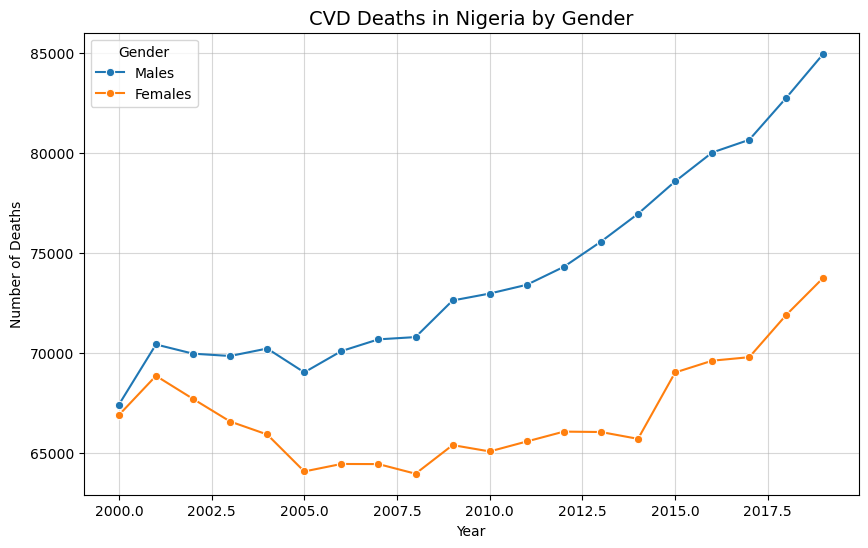

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cvd_gender,x="year",y="numeric",hue="gender",marker="o")
plt.title("CVD Deaths in Nigeria by Gender", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title="Gender")
plt.grid(True, alpha=0.5)
plt.show()

In [107]:
hypertension_indicators = ["Hypertension, adults aged 30–79", 
                           "Raised blood pressure, adults aged 30–79 years", 
                           "Diagnosed hypertension, adults aged 30–79 with hypertension",
                           "Treated hypertension, adults aged 30–79 with hypertension", 
                           "Controlled hypertension, adults aged 30–79 with hypertension"]
hypertension_df = cvd_df[cvd_df['indicator_name'].isin(hypertension_indicators)].copy()

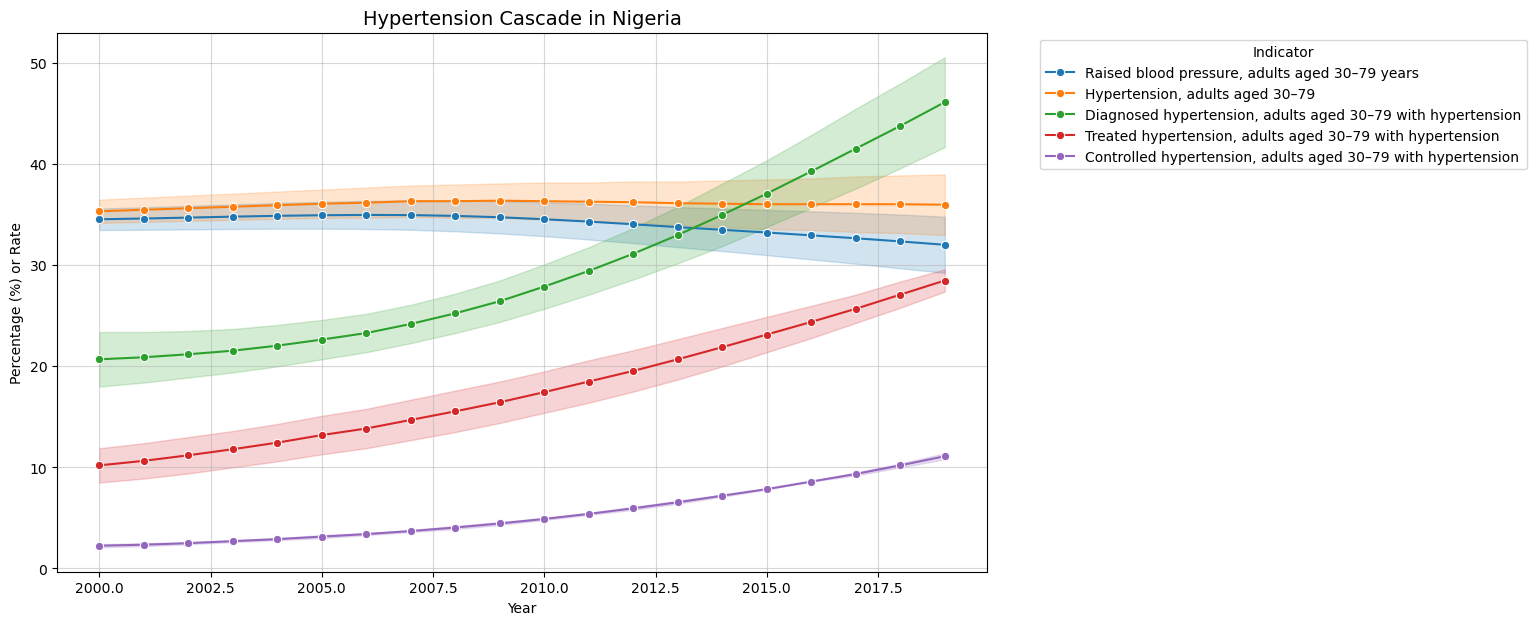

In [108]:
plt.figure(figsize=(12,7))
sns.lineplot(data=hypertension_df,x="year",y="numeric",hue="indicator_name",marker="o")
plt.title("Hypertension Cascade in Nigeria", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percentage (%) or Rate")
plt.legend(title="Indicator", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

In [109]:
##subset data
cvd_deaths = cvd_df[cvd_df['indicator_name'] == 'Number of deaths due to cardiovascular diseases'].copy()
cvd_deaths = cvd_deaths.groupby('year')['numeric'].sum().reset_index()
cvd_deaths.rename(columns={'numeric':'CVD_deaths'}, inplace=True)

hypertension_indicators = ["Hypertension, adults aged 30–79",
                           "Raised blood pressure, adults aged 30–79 years",
                           "Diagnosed hypertension, adults aged 30–79 with hypertension",
                           "Treated hypertension, adults aged 30–79 with hypertension",
                           "Controlled hypertension, adults aged 30–79 with hypertension"]
hypertension_df = cvd_df[cvd_df['indicator_name'].isin(hypertension_indicators)].copy()
hypertension_df = hypertension_df.groupby(['year','indicator_name'])['numeric'].mean().reset_index()

#merge with deaths
merged = hypertension_df.merge(cvd_deaths, on='year', how='left')

#correlation table
corrs = merged.groupby('indicator_name').apply(
    lambda x: x['numeric'].corr(x['CVD_deaths'])
).reset_index()
corrs.columns = ['Indicator', 'Correlation with CVD Deaths']
print(corrs)

                                           Indicator  \
0  Controlled hypertension, adults aged 30–79 wit...   
1  Diagnosed hypertension, adults aged 30–79 with...   
2                    Hypertension, adults aged 30–79   
3     Raised blood pressure, adults aged 30–79 years   
4  Treated hypertension, adults aged 30–79 with h...   

   Correlation with CVD Deaths  
0                     0.940882  
1                     0.945289  
2                     0.007317  
3                    -0.977782  
4                     0.906574  


C:\Users\Ugoeze\AppData\Local\Temp\ipykernel_15376\2867711495.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs = merged.groupby('indicator_name').apply(


In [110]:
#Define risk factors of interest
risk_factors = [
    "Mean population salt intake, adults aged 25+",
    "Mean total cholesterol, adults aged 18+",
    "Obesity, adults aged 18+",
    "Overweight, adults aged 18+",
    "Diabetes, adults aged 18+",
    "Physical inactivity, adults aged 18+",
    "Current tobacco use, adults aged 15+",
    "Total alcohol per capita consumption"]

cvd_deaths_indicator = "Number of deaths due to cardiovascular diseases"

# Prepare data
subset = cvd_df[cvd_df["indicator_name"].isin(risk_factors + [cvd_deaths_indicator])]

# Pivot so years are rows and indicators are columns
df_pivot = subset.pivot_table(index="year", columns="indicator_name", values="numeric", aggfunc="mean")

# Drop years with missing data
df_pivot = df_pivot.dropna(how="any")

In [111]:
#Correlation Table
correlations = {}
for rf in risk_factors:
    corr, _ = pearsonr(df_pivot[rf], df_pivot[cvd_deaths_indicator])
    correlations[rf] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation with CVD deaths"])
print(corr_df)

                                              Correlation with CVD deaths
Mean population salt intake, adults aged 25+                     0.450533
Mean total cholesterol, adults aged 18+                          0.801184
Obesity, adults aged 18+                                         0.855114
Overweight, adults aged 18+                                      0.811901
Diabetes, adults aged 18+                                        0.962539
Physical inactivity, adults aged 18+                            -0.911774
Current tobacco use, adults aged 15+                            -0.812775
Total alcohol per capita consumption                            -0.879896


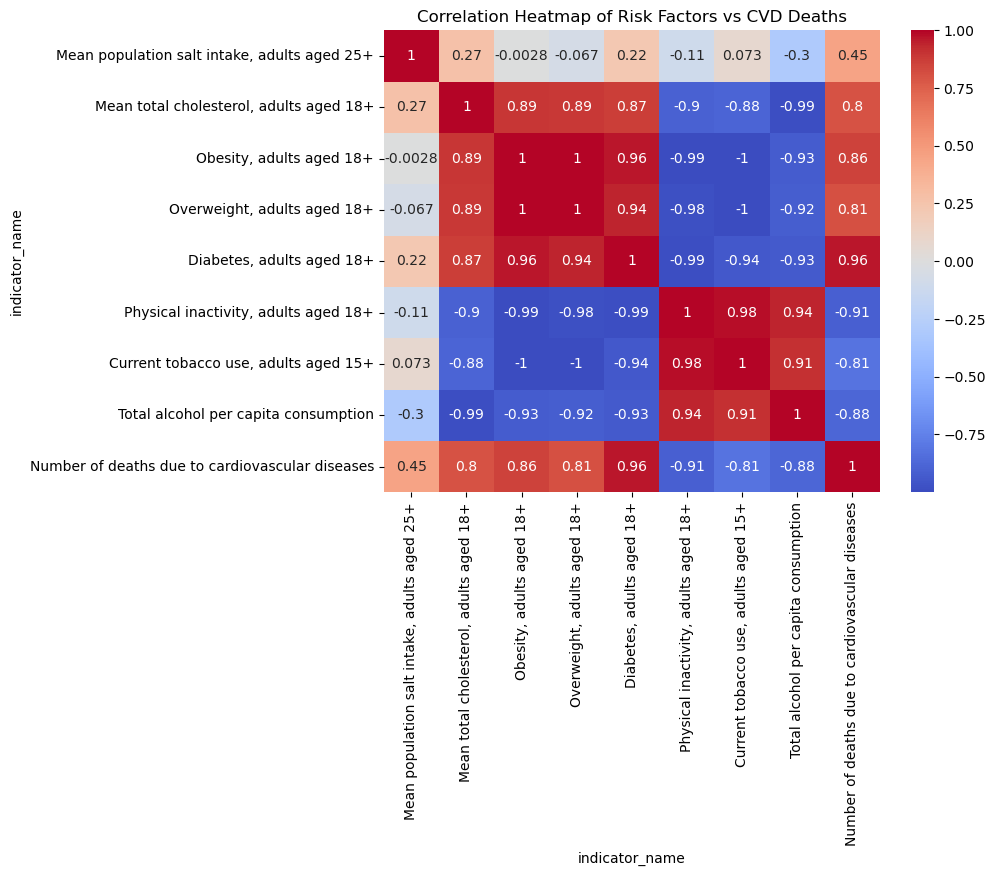

In [112]:
 #Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot[risk_factors + [cvd_deaths_indicator]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Risk Factors vs CVD Deaths")
plt.show()